In [1]:
import os
import sys
path = '/Users/jojo/Downloads/Developer/datasets/titanic_dataset/'
file_name_train = 'train.csv'
file_name_test = 'test.csv'
file_path_test = os.path.join(path, file_name_test)
file_path_train = os.path.join(path, file_name_train)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(file_path_train)
test = pd.read_csv(file_path_test)
train.shape, test.shape

((891, 12), (418, 11))

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
numerical = train.select_dtypes(include='number')
categorical = train.select_dtypes(exclude='number')
print(numerical.columns, categorical.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object') Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


<Axes: xlabel='Survived', ylabel='proportion'>

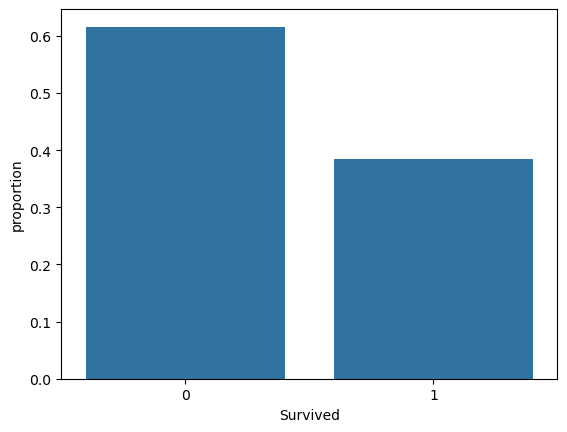

In [6]:
survived_counts = train['Survived'].value_counts(normalize=True)
survived_df = survived_counts.reset_index()
sns.barplot(x='Survived', y='proportion', data=survived_counts.reset_index())

In [7]:
sex_counts = train['Sex'].value_counts(normalize=True)
print(sex_counts)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


<Axes: xlabel='Sex', ylabel='proportion'>

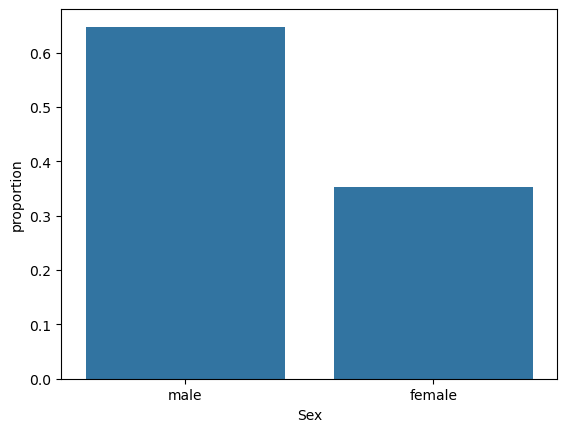

In [8]:
sex_counts_df = sex_counts.reset_index()
sex_counts_df
sns.barplot(x='Sex', y='proportion', data=sex_counts_df)

Now I want to get the ratio and tally up the rows where the male or female died

In [9]:
male_survived, male_died = train[(train['Survived'] ==1) & (train['Sex']=='male')], train[(train['Survived'] ==0) & (train['Sex'] =='male')]
len(male_died), len(male_survived), len(train), 


(468, 109, 891)

In [10]:
female_survived, female_died = train[(train['Survived'] == 1) & (train['Sex'] == 'female')], train[(train['Survived'] == 0) & (train['Sex'] == 'female')]
female_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


<Axes: >

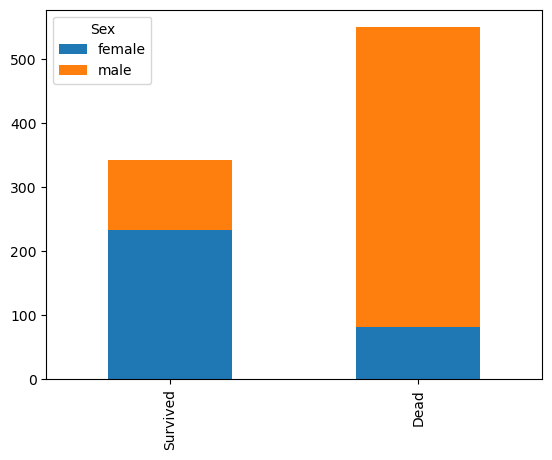

In [11]:
survived = train[train['Survived']==1]['Sex'].value_counts()
dead = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=True)

Now we are going to fill in the missing numerical data types

In [12]:
missing_values = train.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Let us deal with the missing value of age, what we can do is fill these in with the median age

In [13]:
age_median= train['Age'].median()
train['Age'].fillna(age_median, inplace=True)

/var/folders/2x/zyb98t9x1nvd6b5zzxkf27rm0000gn/T/ipykernel_48331/81635974.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(age_median, inplace=True)


Now we are going to perfrom binning in terms of the age, to improve the models interpretability and potentially move outliers

In [14]:
#We are going to return an age group based on the age of the person
def age_group(age):
  if age < 18:
    return 0
  elif age < 50:
    return 1
  else:
    return 2   

In [15]:
train['Age_group'] = train['Age'].apply(age_group) 
train['Age_group'].value_counts()

Age_group
1    704
0    113
2     74
Name: count, dtype: int64

In [16]:
train.drop('Age', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,1


Now we are going to replace the Embarked category

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
embarked = pd.DataFrame(train['Embarked'])
embarked = imputer.fit_transform(embarked) 
embarked_df = pd.DataFrame(embarked, columns=['Embarked'])

train.drop('Embarked', axis=1, inplace=True)
train = pd.concat([train, embarked_df], axis=1)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Age_group        0
Embarked         0
dtype: int64

In [18]:
unique_values = train['Cabin'].value_counts()
print(unique_values)

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


We are now going to be setting the new indicies of all of cabin classes and sorting them by a classes A, B, and C.


In [19]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [20]:
cabin_mapping = {"A": 0.4, "B": 0.8, "C": 1.2, "D": 1.6, "E": 2, "F": 2.4, "G": 2.8, "T": 3.2}

def map_cabin(cabin):
  if pd.isna(cabin):
    return np.nan
  elif cabin[0] in cabin_mapping:
    return cabin_mapping[cabin[0]]



In [21]:
train['Cabin'] = train['Cabin'].apply(map_cabin)
cabin_mean = round(train['Cabin'].mean())
train['Cabin'].fillna(cabin_mean, inplace=True)

/var/folders/2x/zyb98t9x1nvd6b5zzxkf27rm0000gn/T/ipykernel_48331/3709519656.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Cabin'].fillna(cabin_mean, inplace=True)


In [22]:
train['Cabin'].value_counts()

Cabin
1.0    687
1.2     59
0.8     47
1.6     33
2.0     32
0.4     15
2.4     13
2.8      4
3.2      1
Name: count, dtype: int64

In [23]:
numerical_data = train.select_dtypes(include='number')
categorical_data = train.select_dtypes(include='object')
print(numerical_data.dtypes, categorical_data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
SibSp            int64
Parch            int64
Fare           float64
Cabin          float64
Age_group        int64
dtype: object Name        object
Sex         object
Ticket      object
Embarked    object
dtype: object


Now we are going to transform our object features

In [24]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [25]:
from sklearn.preprocessing import LabelEncoder
train.drop(columns=['Name', 'Ticket'], axis=1, inplace=True)
label_encoder = LabelEncoder()
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
train['Sex'] = label_encoder.fit_transform(train['Sex'])
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Age_group,Embarked,FamilySize
0,1,0,3,1,1,0,7.2500,1.0,1,2,2
1,2,1,1,0,1,0,71.2833,1.2,1,0,2
2,3,1,3,0,0,0,7.9250,1.0,1,2,1
3,4,1,1,0,1,0,53.1000,1.2,1,2,2
4,5,0,3,1,0,0,8.0500,1.0,1,2,1


In [26]:
data_train = train.drop('Survived', axis=1)
target = train['Survived']

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## RandomForestClassifier Model


In [28]:
rf = RandomForestClassifier()
pipeline = Pipeline([('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(data_train, target, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred


array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0])

In [29]:
prediction = pd.DataFrame({'survived': y_test, 'predicted': y_pred})

In [30]:
predicted_survived = prediction[prediction['predicted'] == 1].sum()
predicted_survived

survived     54
predicted    65
dtype: int64

In [31]:
accuracy_score(y_test, y_pred)

0.8268156424581006

In [32]:
cv_score = cross_val_score(pipeline, data_train, target, cv=5)
print(f'Cross validation scores: {cv_score}')
print(f'Cross validation mean score: {cv_score.mean()}')

Cross validation scores: [0.69273743 0.78651685 0.83146067 0.84269663 0.83707865]
Cross validation mean score: 0.7980980478312725


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_depth': [3, 5, 10],
              'n_estimators': [10, 100, 200],
              'max_features': [1, 3, 5, 7],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3]
              }

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5 ,error_score=0)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.832837584950261


In [34]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([('scaler', StandardScaler()),('model_lr', LogisticRegression())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model_lr', LogisticRegression())])

In [35]:
predict = pipeline.predict(X_test)

In [36]:
print(f'Accuracy score: {accuracy_score(y_test, predict)}')

Accuracy score: 0.8100558659217877


Now lets do hyperparamters 

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = {"model__solver":solvers, "model__penalty":penalty, "model__C":c_values}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Include the pipeline here
pipeline = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

grid_search = GridSearchCV(estimator=pipeline, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Mean:{mean} Stdev: {stdev} with: {param}")
solvers = ['newton-cg', 'lbfgs', 'liblinear']

Best: 0.801467 using {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Mean:0.799113197704747 Stdev: 0.047211917065078754 with: {'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Mean:0.799113197704747 Stdev: 0.047211917065078754 with: {'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Mean:0.799113197704747 Stdev: 0.047211917065078754 with: {'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Mean:0.799113197704747 Stdev: 0.047211917065078754 with: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Mean:0.799113197704747 Stdev: 0.047211917065078754 with: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Mean:0.799113197704747 Stdev: 0.047211917065078754 with: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Mean:0.7986502347417841 Stdev: 0.04873827108936094 with: {'model__C': 1.0, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Mean:0.7986502

In [38]:
#Getting the best model
best_model = grid_result.best_estimator_

In [39]:
predictions = best_model.predict(X_test)
predicted_df = pd.DataFrame({'survived': y_test, 'predicted': predictions})

In [40]:
print(predicted_df.head())

     survived  predicted
709         1          0
439         0          0
840         0          0
720         1          1
39          1          1
